<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lab)

***

Week 2 | Lab 6.1

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!

ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [3]:
ufo.head()
print ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.1+ MB
None


### 2. What is the breakdown of dtypes in our dataframe?

In [4]:
# dtypes: object(5)

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 


In [5]:
ufo.describe().T

,count,unique,top,freq
City,80496,13504,Seattle,646
Colors Reported,17034,31,ORANGE,5216
Shape Reported,72141,27,LIGHT,16332
State,80543,52,CA,10743
Time,80543,68901,7/4/2014 22:00,45


### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [6]:
#ufo.groupby(['Colors Reported']).size().sort_values(ascending=False)
ufo.groupby(['Colors Reported'])[['Colors Reported']].count().sort_values(by='Colors Reported', ascending=False)

,Colors Reported
Colors Reported,
ORANGE,5216
RED,4809
GREEN,1897
BLUE,1855
YELLOW,842
RED ORANGE,486
RED GREEN,469
RED BLUE,445
RED GREEN BLUE,166


### 4. Which shapes are most commonly reported?

In [7]:
#ufo.groupby(['Shape Reported']).size().sort_values(ascending=False)
ufo.groupby(['Shape Reported'])[['Shape Reported']].count().sort_values(by='Shape Reported', ascending=False)

,Shape Reported
Shape Reported,
LIGHT,16332
TRIANGLE,7816
CIRCLE,7725
FIREBALL,6249
OTHER,5506
SPHERE,5231
DISK,5226
OVAL,3721
FORMATION,2405


### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [8]:
#ufo.groupby(['Shape Reported', 'Colors Reported']).size().sort_values(ascending=False)
ufo.groupby(['Shape Reported', 'Colors Reported'])[['Colors Reported']].count().sort_values(by='Colors Reported', ascending=False)

Colors Reported
Shape Reported Colors Reported                              
LIGHT          RED                                      1188
               ORANGE                                   1122
FIREBALL       ORANGE                                    884
CIRCLE         ORANGE                                    796
SPHERE         ORANGE                                    569
TRIANGLE       RED                                       561
CIRCLE         RED                                       548
LIGHT          BLUE                                      403
               GREEN                                     378
FIREBALL       RED                                       377
               GREEN                                     353
SPHERE         RED                                       335
TRIANGLE       ORANGE                                    299
OVAL           ORANGE                                    236
OTHER          RED                                       233
LIGHT          YELLOW                                    208
FORMATION      RED                                       207
               ORANGE                                    206
OTHER          ORANGE                                    199
CIRCLE         BLUE                                      194
OVAL           RED                                       191
DISK           RED                                       187
CIRCLE         GREEN                                     182
SPHERE         BLUE                                      148
               GREEN                                     144
FIREBALL       BLUE                                      142
DISK           ORANGE                                    122
TRIANGLE       BLUE                                      120
OTHER          BLUE                                      116
               GREEN                                     116
...                                                      ...
RECTANGLE      GREEN BLUE                                  1
               ORANGE GREEN BLUE                           1
               ORANGE YELLOW GREEN                         1
               RED GREEN BLUE                              1
OVAL           RED ORANGE YELLOW BLUE                      1
RECTANGLE      RED ORANGE GREEN                            1
               RED ORANGE YELLOW                           1
               RED YELLOW BLUE                             1
               RED YELLOW GREEN BLUE                       1
               YELLOW BLUE                                 1
ROUND          ORANGE                                      1
CIRCLE         RED ORANGE YELLOW GREEN BLUE                1
OVAL           RED ORANGE YELLOW                           1
CROSS          RED ORANGE                                  1
CONE           RED ORANGE                                  1
LIGHT          ORANGE YELLOW BLUE                          1
               ORANGE YELLOW GREEN                         1
               ORANGE YELLOW GREEN BLUE                    1
CROSS          ORANGE YELLOW                               1
LIGHT          RED ORANGE YELLOW GREEN                     1
CRESCENT       ORANGE                                      1
OTHER          ORANGE YELLOW GREEN                         1
OVAL           RED ORANGE GREEN                            1
CONE           RED BLUE                                    1
               ORANGE YELLOW                               1
OTHER          RED ORANGE GREEN BLUE                       1
               RED ORANGE YELLOW GREEN                     1
               RED YELLOW GREEN                            1
OVAL           RED ORANGE BLUE                             1
VARIOUS        YELLOW GREEN                                1

[382 rows x 1 columns]

### 6. Display only the group for "CIGAR" using a mask.. 
Go ahead try it out.

In [9]:
ufo[ufo['Shape Reported']=='CIGAR']
#ufo[mask]

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


In [10]:
#ufo.groupby(['Shape Reported']).size()
#ufo.groupby(['Shape Reported', 'Colors Reported'])[['Colors Reported']].where(ufo['Shape Reported']=='CIGAR')
#.sort_values(by='Colors Reported', ascending=False)
#ufo.groupby( ['Shape Reported', 'Colors Reported'] )[ ['CIGAR'] ]

### 7. Return only the group for "VARIOUS" without using a mask..
It can be done and we're not just making this up!

In [11]:
#ufo[ufo['Shape Reported']=='VARIOUS']
ufo.groupby([ufo['Shape Reported']=='VARIOUS']).size()

Shape Reported
False    78586
True      1957
dtype: int64

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

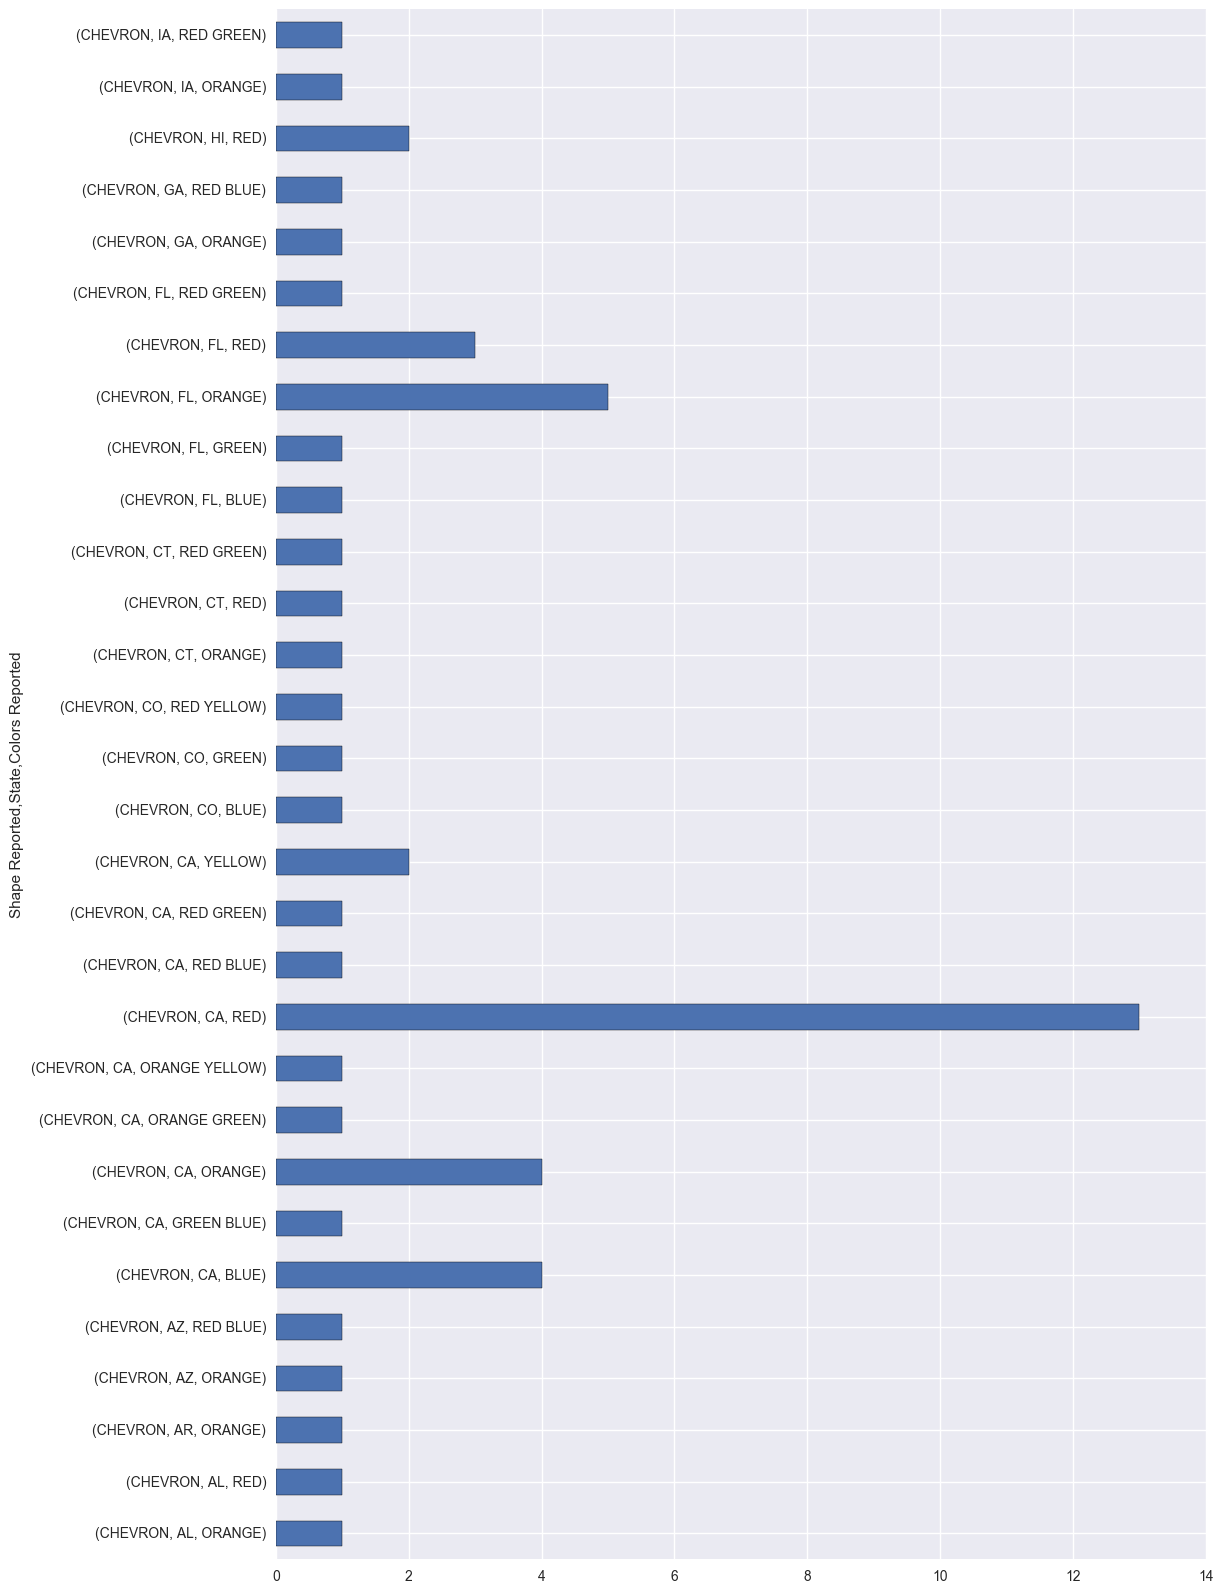

In [38]:
fig = plt.figure(figsize=(12,20))
ufo.groupby(['Shape Reported', 'State', 'Colors Reported']).size().ix[:30].plot(kind='barh');
plt.show()

### 9. Plot counts of sightings per City

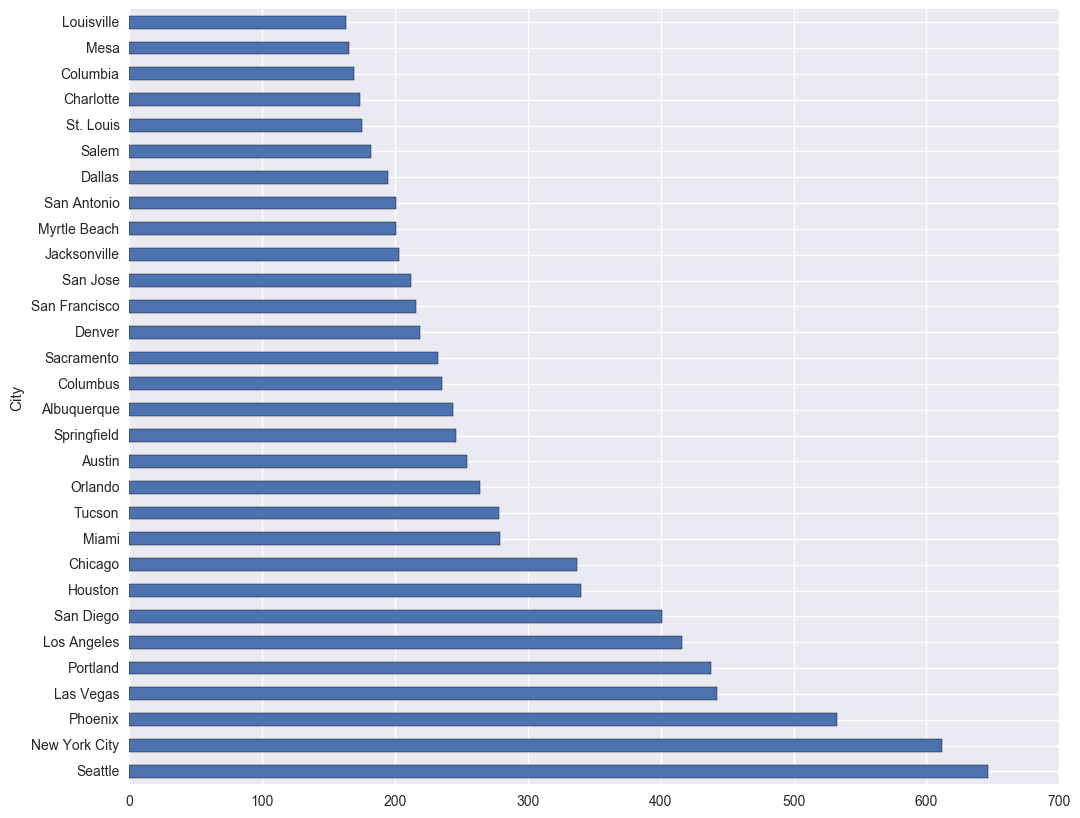

In [32]:
ufo.groupby('City').size().sort_values(ascending=False).ix[:30].plot(kind='barh', figsize=(12,10));

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [17]:
ufo.groupby(['State', 'Shape Reported']).size().sort_values(ascending=False).head(20)

State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64

### 13.  Bonus:  What are the top 20 shapes by City + State?


In [19]:
ufo.groupby(['Shape Reported', 'State', 'City']).size().sort_values(ascending=False).head(20)

Shape Reported  State  City         
LIGHT           WA     Seattle          129
                AZ     Phoenix          105
                NY     New York City    105
                CA     San Diego         94
                OR     Portland          88
                NV     Las Vegas         84
                CA     Los Angeles       72
                SC     Myrtle Beach      64
DISK            NY     New York City     63
LIGHT           TX     Houston           63
                IL     Tinley Park       60
                AZ     Tucson            58
CIRCLE          NY     New York City     56
FIREBALL        WA     Seattle           55
LIGHT           FL     Orlando           55
                       Miami             53
OTHER           WA     Seattle           51
SPHERE          NY     New York City     51
CIRCLE          WA     Seattle           50
OVAL            NY     New York City     48
dtype: int64

### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art